## Inference TF Model

In [34]:
import cv2
from tensorflow.keras.models import load_model
import tensorflow as tf
from time import time 
import matplotlib.pyplot as plt
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

#tf.get_logger().setLevel('INFO')

def inference_func(image_path):
    
    """ This prediction function loads a tf model and predict if the hand position is palmar or dorsal.
    Parameters:
        model type: TF model
        input type: image
        input size: (1, 224, 224, 3)
        output: str --> Dorsal or Palmar
    """
    # Read the image as array
    image = cv2.imread(image_path)
    # Resize and reshape the image according to the model input shape
    image = cv2.resize(image, (224, 224))
    image = tf.reshape(image, [-1, 224, 224, 3])

    # Load the inference model
    inference_model = load_model('./trained_models/tl_model_v1.weights.best.hdf5') # initialize the best trained weights
    # Record time before inference
    start_time = time()
    prediction = inference_model.predict(image)[0]
    if max(prediction) == prediction[0]:
        predicted_label = "Dorsal"
        print(f"Predicted Class: {predicted_label}")
    else:
        predicted_label = "Plamar"
        print(f"Predicted Class: {predicted_label}")
    # Record time after inference
    end_time = time()
    print(f"Prediction Time: {end_time-start_time}")
    
    # Visualize predicted image
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB))
    plt.title(predicted_label)
    plt.axis('off')
    plt.show()

Predicted Class: Dorsal
Prediction Time: 1.9411959648132324


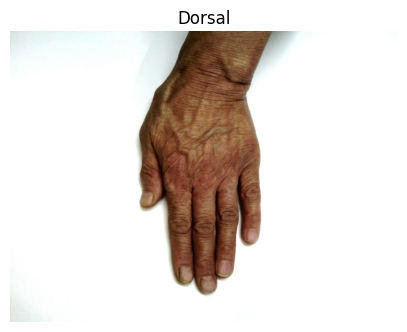

In [39]:
inference_func("./split_dataset/val/dorsal/Hand_0009411.jpg")

Predicted Class: Dorsal
Prediction Time: 3.607346773147583


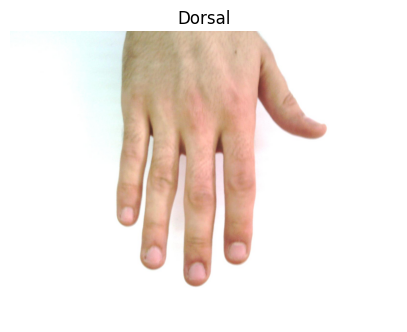

In [36]:
inference_func("./split_dataset/val/dorsal/Hand_0000002.jpg")

## Inference TFLite Model

In [31]:
# Libraries Importation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from time import time
import matplotlib.pyplot as plt

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


# Define our TFLite Prediction Function
def tflite_prediction(image_path):
    
    """ This prediction function loads a tflite model and predict if the hand position is palmar or dorsal.
        Parameters:
            model type: TFLite model
            input type: image
            input size: (1, 224, 224, 3)
            output: str --> Dorsal or Palmar
    """
    
    tflite_model_path = "./trained_models/hand_detection_tflite_model.tflite"

    # Load the TFLite model and allocate tensors.
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Test the model on input data.
    input_shape = input_details[0]['shape']
    #print(input_shape)

    # Load image
    image = load_img(image_path, target_size=(224,224))
    # Convert image to array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    # Call TFLite interpreter
    interpreter.set_tensor(input_details[0]['index'], image)

    # Record time before inference
    start_time=time()
    # Run inference
    interpreter.invoke()
    # output prediction
    output_data_tflite = interpreter.get_tensor(output_details[0]['index'])
    if max(output_data_tflite[0]) == output_data_tflite[0][0]:
        predicted_label = "Dorsal"
        print(f"Predicted Class: {predicted_label}")
    else:
        predicted_label = "Plamar"
        print(f"Predicted Class: {predicted_label}")
    # Record time after inference
    end_time=time()
    print(f"Prediction Time: {end_time-start_time}")
    
    # Visualize predicted image
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB))
    plt.title(predicted_label)
    plt.axis('off')
    plt.show()

Predicted Class: Dorsal
Prediction Time: 0.4298286437988281


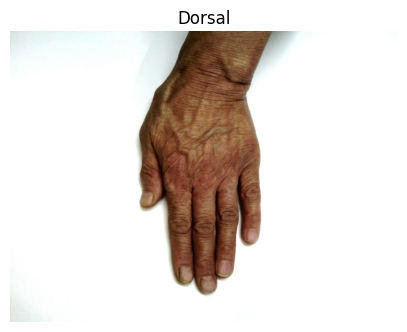

In [38]:
tflite_prediction("./split_dataset/val/dorsal/Hand_0009411.jpg")

Predicted Class: Dorsal
Prediction Time: 0.4369962215423584


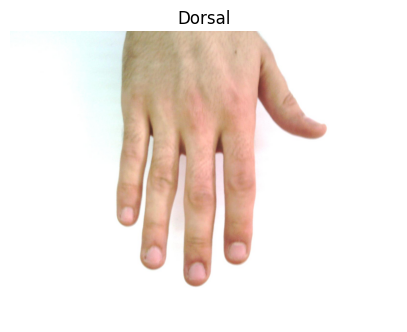

In [33]:
tflite_prediction("./split_dataset/val/dorsal/Hand_0000002.jpg")